In [11]:
import numpy as np
import casadi as ca
import tensorflow as tf
import matplotlib.pyplot as plt

data = np.loadtxt('foo.csv',delimiter=',',dtype=np.float32)

rows,cols = data.shape
dt = 0.05

x_data = data[0:-1,:]
#u_data=data[0:-1,-2:]
x_dot_data = (data[1:,3:8]-data[0:-1,3:8])/dt

print(x_data.shape)
print(x_dot_data.shape)

(4862, 10)
(4862, 5)


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_data, x_dot_data, test_size=0.2, random_state=1,shuffle=True)

#from sklearn.preprocessing import StandardScaler

#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)


In [14]:
model=tf.keras.Sequential([tf.keras.Input(shape=(x_data.shape[1],),dtype=np.float32),
                           tf.keras.layers.Dense(64, activation='relu',dtype=np.float32),
                           #tf.keras.layers.Dense(128,dtype=np.float64),
                           tf.keras.layers.Dense(64,dtype=np.float32),
                           tf.keras.layers.Dense(5,dtype=np.float32)])
model.compile(loss="mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                704       
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 5)                 325       
                                                                 
Total params: 5,189
Trainable params: 5,189
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
history = model.fit(X_train, y_train, batch_size=8, epochs=200, verbose=1, validation_split=0.2)

Train on 3111 samples, validate on 778 samples
Epoch 1/200
3111/3111 [==============================] - 0s 152us/sample - loss: 703.7348 - mean_squared_error: 703.7350 - val_loss: 490.4517 - val_mean_squared_error: 490.4516
Epoch 2/200
 864/3111 [=======>......................] - ETA: 0s - loss: 425.9660 - mean_squared_error: 425.9661

/home/acsr/.local/lib/python3.8/site-packages/keras/engine/training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


3111/3111 [==============================] - 0s 133us/sample - loss: 332.7518 - mean_squared_error: 332.7517 - val_loss: 297.0699 - val_mean_squared_error: 297.0699
Epoch 3/200
3111/3111 [==============================] - 0s 131us/sample - loss: 173.5627 - mean_squared_error: 173.5628 - val_loss: 130.5028 - val_mean_squared_error: 130.5028
Epoch 4/200
3111/3111 [==============================] - 0s 129us/sample - loss: 90.6723 - mean_squared_error: 90.6722 - val_loss: 115.1030 - val_mean_squared_error: 115.1030
Epoch 5/200
3111/3111 [==============================] - 0s 128us/sample - loss: 86.7967 - mean_squared_error: 86.7967 - val_loss: 115.0540 - val_mean_squared_error: 115.0540
Epoch 6/200
3111/3111 [==============================] - 0s 130us/sample - loss: 85.7009 - mean_squared_error: 85.7008 - val_loss: 115.3493 - val_mean_squared_error: 115.3493
Epoch 7/200
3111/3111 [==============================] - 0s 128us/sample - loss: 84.7960 - mean_squared_error: 84.7960 - val_loss: 11

[[  3.2044985    2.8580022   -4.335338    -0.97209245  -8.078299
   11.934238    -4.3051715    1.7619288   -4.334387     1.7738854 ]
 [  3.0606477    2.3499196   -3.5084174   -4.6307216  -12.046323
   21.082996    -2.079488     4.4447107   -2.0643814    4.4629197 ]
 [  2.7434864    1.6765937   -2.2563655   -8.049493   -14.625941
   28.625002    -2.0644796    4.4628015   -2.0643814    4.4629197 ]
 [  2.25738      0.91536564  -0.68738097 -11.365042   -15.529889
   33.688084    -2.064382     4.4629188   -2.0643814    4.4629197 ]
 [  1.6114401    0.15330298   1.0657892  -14.411873   -14.659207
   35.960903    -2.0643814    4.4629197   -2.0643814    4.4629197 ]]


/home/acsr/.local/lib/python3.8/site-packages/keras/engine/training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


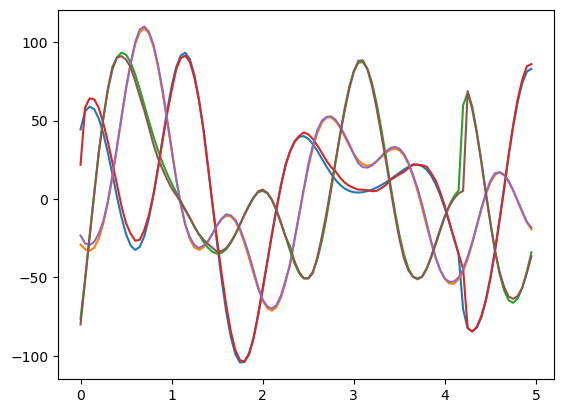

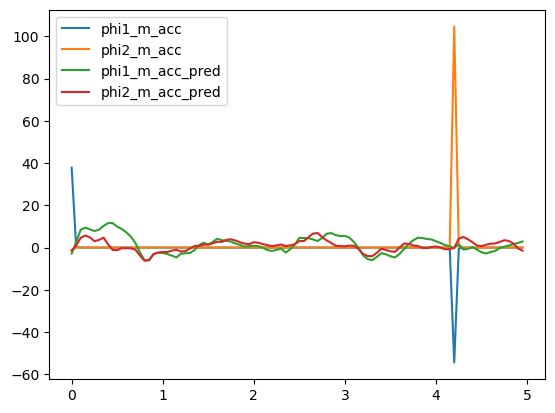

In [16]:
data_valid = np.loadtxt('foo_valid.csv',delimiter=',',dtype=np.float32)
print(data[0:5,:])
#data_valid = data_valid[0:100,:]

acc_pred = model.predict(data_valid[0:100,:])

#print(acc_pred.dtype)

t = np.linspace(0,dt*99,99+1)
plt.figure(1)
acc = (data_valid[1:101,:] - data_valid[0:100,:])/dt
plt.plot(t,acc[:,3],label='phi1_acc')
plt.plot(t,acc[:,4],label='phi2_acc')
plt.plot(t,acc[:,5],label='phi3_acc')

plt.plot(t,acc_pred[:,0],label='phi1_acc_pred')
plt.plot(t,acc_pred[:,1],label='phi2_acc_pred')
plt.plot(t,acc_pred[:,2],label='phi3_acc_pred')

plt.figure(2)
plt.plot(t,acc[:,6],label='phi1_m_acc')
plt.plot(t,acc[:,7],label='phi2_m_acc')


plt.plot(t,acc_pred[:,3],label='phi1_m_acc_pred')
plt.plot(t,acc_pred[:,4],label='phi2_m_acc_pred')


plt.legend()
plt.show()

In [17]:
model.save('output/disk.h5')

In [18]:
model1=tf.keras.models.load_model('output/disk.h5')

In [23]:
a = np.array([[1, 1, -1.5, 1, -1, 1, 0, 0,0,0]],dtype=np.float32)
b = model1(a)
print(b)

Tensor("sequential_2_2/dense_8/BiasAdd:0", shape=(1, 5), dtype=float32)
